In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('C:\\Users\\swathi Naga\\OneDrive\\Desktop\\TSLA.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.shape


(2416, 7)

In [6]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


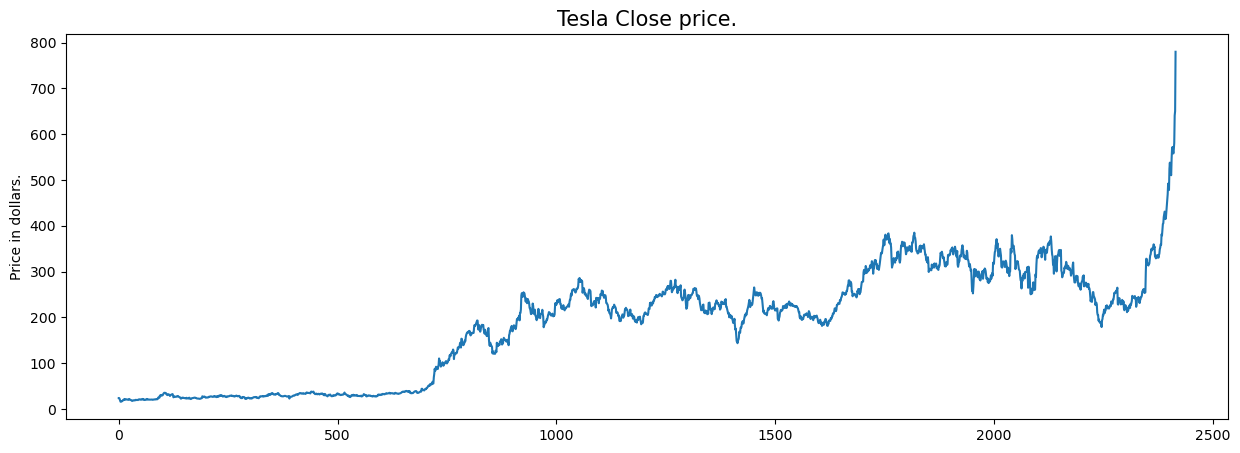

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [9]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [10]:
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [11]:
df = df.drop(['Adj Close'], axis=1)


In [12]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

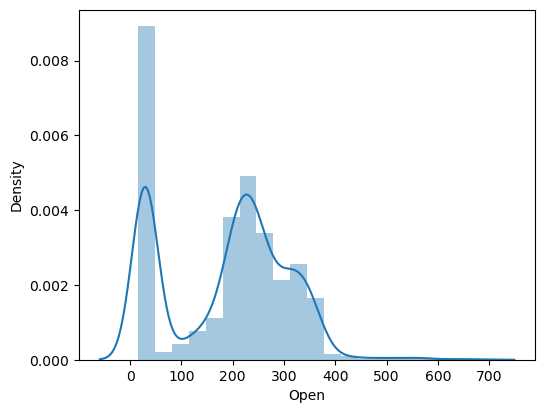

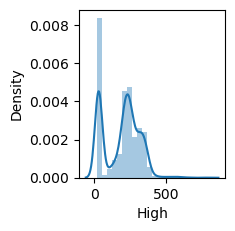

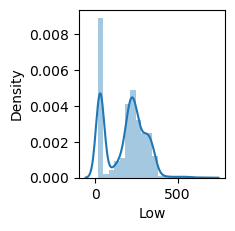

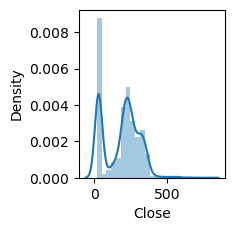

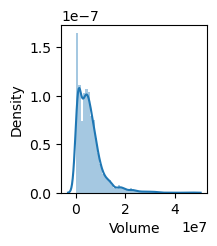

In [16]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show()


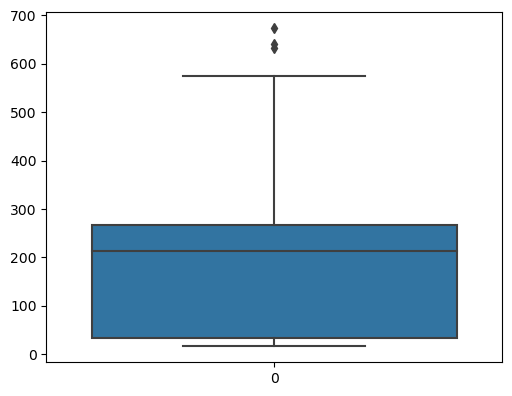

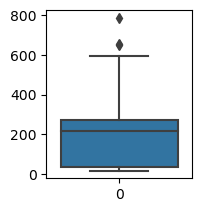

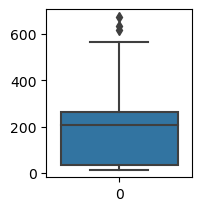

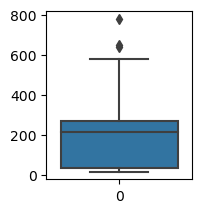

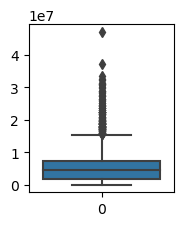

In [18]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()


In [24]:
splitted = df['Date'].str.split('/', expand=True)

# Check if the 'Date' column exists and has expected format
if len(splitted.columns) >= 3:
    df['day'] = splitted[1].astype('int')
    df['month'] = splitted[0].astype('int')
    df['year'] = splitted[2].astype('int')
else:
    print("The 'Date' column does not exist or does not have the expected format.")

df.head()


The 'Date' column does not exist or does not have the expected format.


,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [27]:
import numpy as np

# Check if 'month' column exists in the DataFrame
if 'month' in df.columns:
    df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
else:
    print("Column 'month' is not present in the DataFrame.")

df.head()


Column 'month' is not present in the DataFrame.


,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [31]:
# Check if 'year' column exists in the DataFrame
if 'year' in df.columns:
    data_grouped = df.groupby('year').mean()
    plt.subplots(figsize=(20,10))
    for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
        plt.subplot(2, 2, i+1)
        plt.plot(data_grouped.index, data_grouped[col])
        plt.xlabel('Year')
        plt.ylabel(col)
        plt.title(f'{col} vs Year')
else:
    print("Column 'year' is not present in the DataFrame.")


Column 'year' is not present in the DataFrame.


C:\Users\swathi Naga\AppData\Local\Temp\ipykernel_2080\1912830217.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


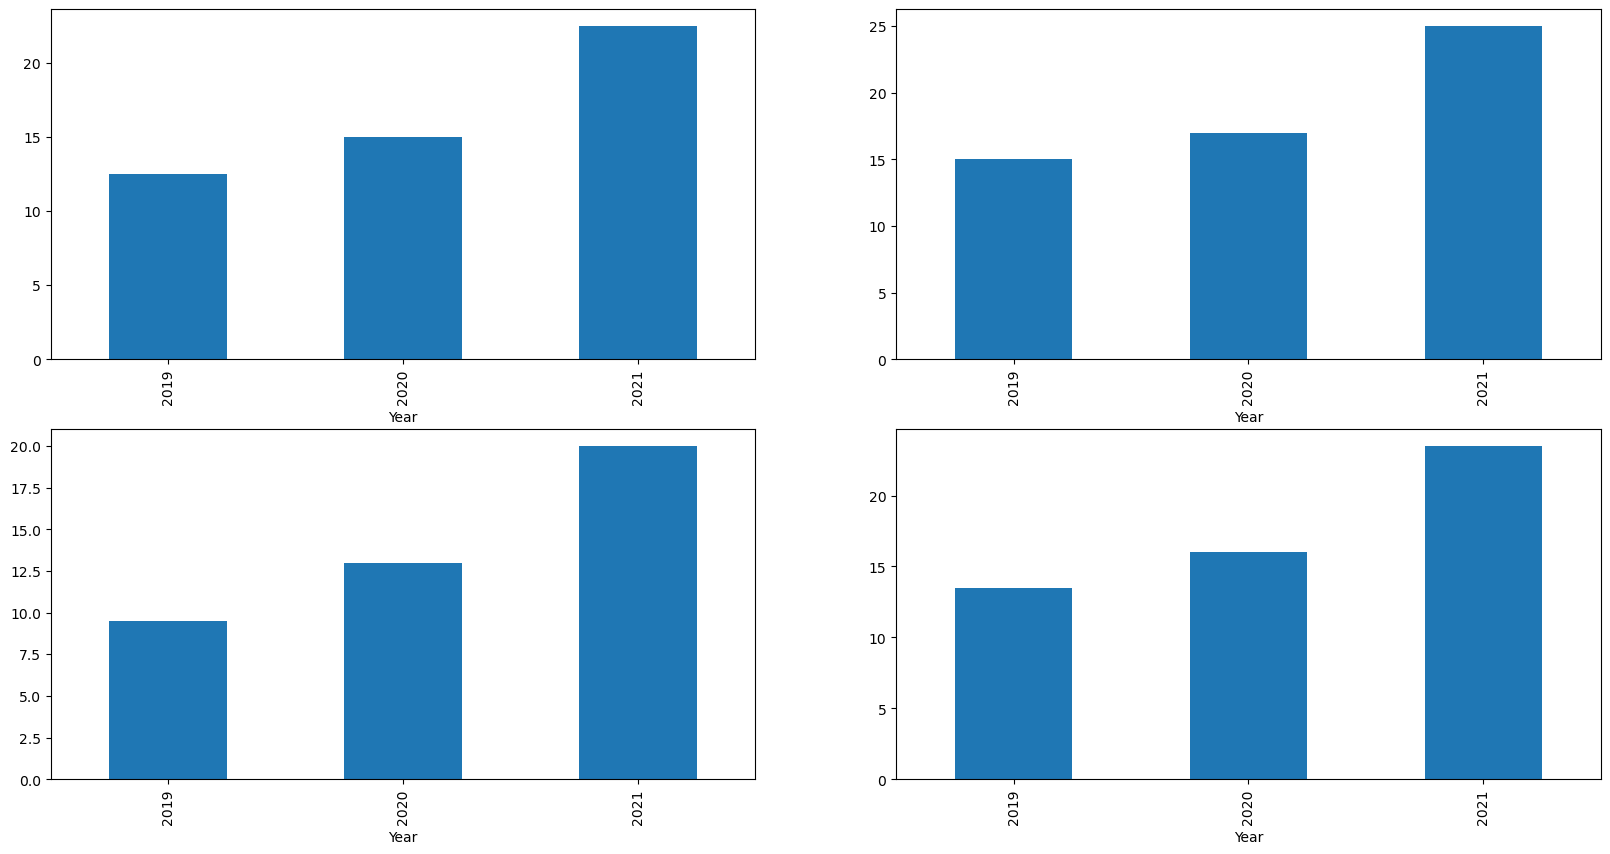

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the DataFrame with your data
df = pd.DataFrame({'Year': [2019, 2019, 2020, 2020, 2021, 2021],
                   'Open': [10, 15, 12, 18, 20, 25],
                   'High': [12, 18, 14, 20, 22, 28],
                   'Low': [8, 11, 10, 16, 18, 22],
                   'Close': [11, 16, 13, 19, 21, 26]})

data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()

plt.show()


In [5]:
print(df.columns)


Index(['Year', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [6]:
df.groupby('Year').mean()


,Open,High,Low,Close
Year,,,,
2019,12.5,15.0,9.5,13.5
2020,15.0,17.0,13.0,16.0
2021,22.5,25.0,20.0,23.5


In [8]:
import numpy as np

df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


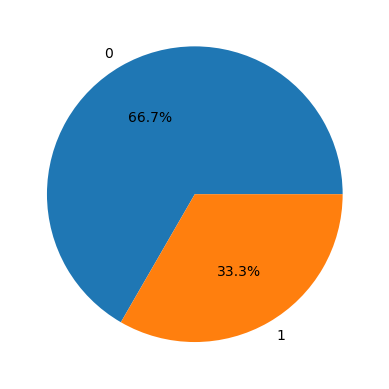

In [9]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


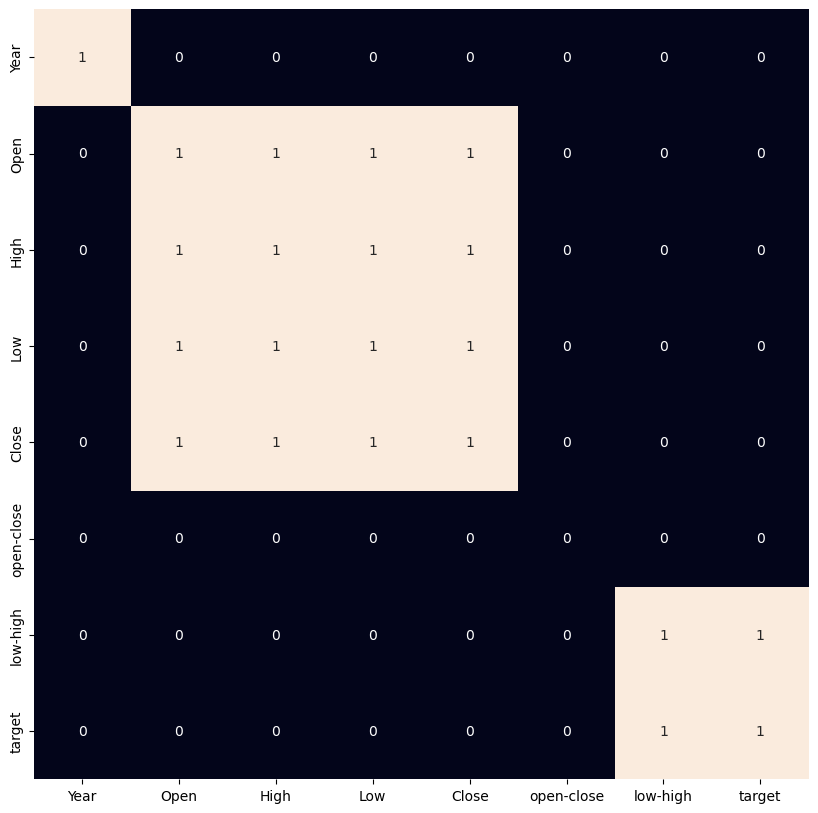

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler


In [3]:
import pandas as pd

# Replace this with your actual data
data = {
    'open-close': [1.2, 2.3, 1.8, 2.1],
    'low-high': [0.5, 1.0, 0.8, 0.9],
    'Year': [2020, 2021, 2022, 2023],
    'target': [0, 1, 0, 1]
}

df = pd.DataFrame(data)


In [6]:
from sklearn.preprocessing import StandardScaler

features = df[['open-close', 'low-high', 'Year']]  # Remove 'is_quarter_end'
target = df['target']
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Continue with the remaining code...


In [8]:
features = df[['open-close', 'low-high', 'Year']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(3, 3) (1, 3)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

# Continue with the remaining code...


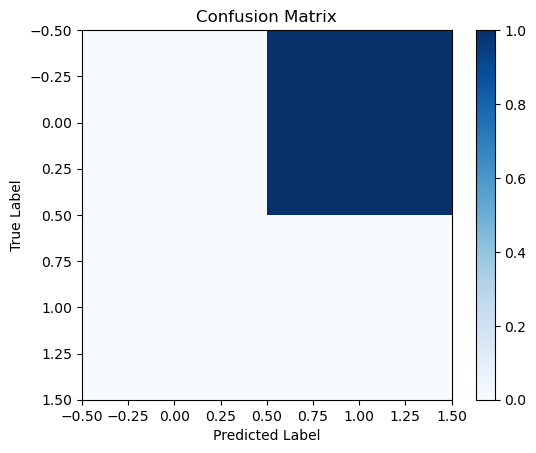

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Your code for model training and evaluation

# Compute confusion matrix
cm = confusion_matrix(Y_valid, models[0].predict(X_valid))

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
